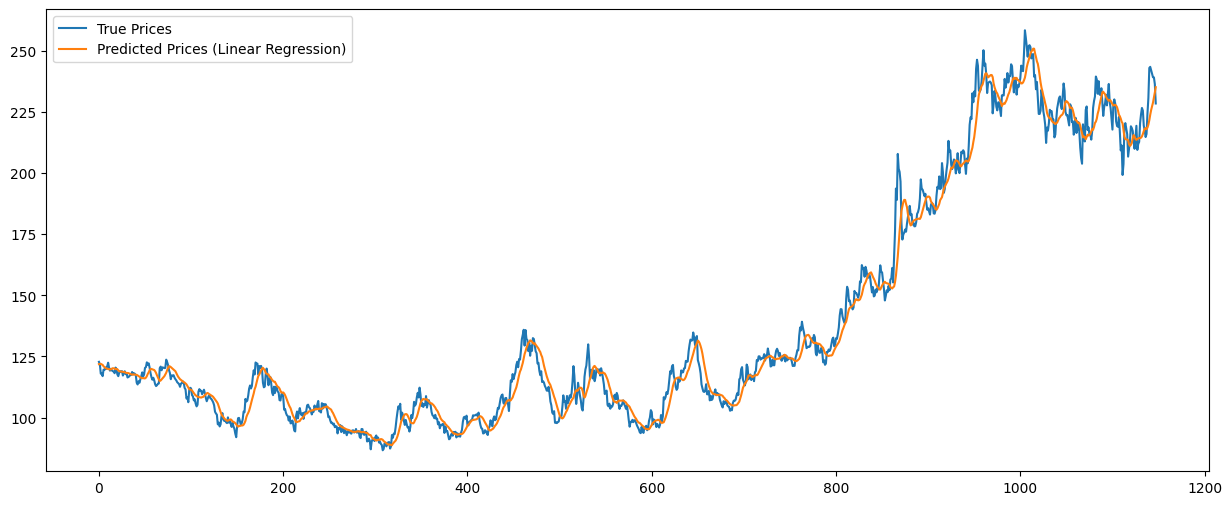

Coeficiente (inclinação): 0.9966814546006173
Interceptação: 0.0010685027574617312


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('/content/coffee.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Usar apenas a coluna Close para este exemplo
data = data[['Close']]

# Normalizar os dados
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Escolher o comprimento da sequência temporal
sequence_length = 10

# Criar sequências e rótulos
X, y = create_sequences(data_scaled, sequence_length)

# Apenas para simplificar, utilizaremos a média das sequências como entrada
X_mean = np.mean(X, axis=1)

# Redimensionar X_mean para torná-lo bidimensional
X_mean = X_mean.reshape(-1, 1)

# Redimensionar y para ser bidimensional
y = y.reshape(-1, 1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, shuffle=False)

# Construir o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Desnormalizar as previsões e os rótulos
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True Prices')
plt.plot(predictions, label='Predicted Prices (Linear Regression)')
plt.legend()
plt.show()

# Coeficientes da regressão linear
print("Coeficiente (inclinação):", model.coef_[0][0])
print("Interceptação:", model.intercept_[0])
